In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import sklearn

In [53]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', as_frame=False, cache=False, parser='auto')

X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

# test_size and random_state need to be experimentally determined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [54]:
import matplotlib.pyplot as plt

def plot_example(X, y):
    """Plot the first 5 images and their labels in a row."""

    # Slice X, y to be 5 images, reshape back into matrices
    for i, (img, y) in enumerate(zip(X[:5].reshape(5, 28, 28), y[:5])):
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)

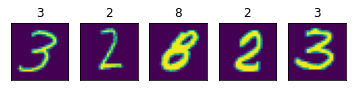

In [55]:
plot_example(X_train, y_train)

In [56]:
from keras import layers

In [57]:
model = keras.Sequential([
    
    layers.Flatten(),
    layers.Dense(784),
    layers.Dense(10, activation='sigmoid'),

])

In [58]:
model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(epsilon=0.01),
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [59]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=10,
)

Epoch 1/10
  11/1641 [..............................] - ETA: 8s - loss: 95.5331 - accuracy: 0.4460   

2023-03-30 21:01:07.865526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1634/1641 [============================>.] - ETA: 0s - loss: 22.5567 - accuracy: 0.8500

2023-03-30 21:01:15.419315: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1641/1641 [==============================] - 9s 5ms/step - loss: 22.4823 - accuracy: 0.8501 - val_loss: 6.7417 - val_accuracy: 0.8665
Epoch 2/10
1641/1641 [==============================] - 9s 5ms/step - loss: 6.0158 - accuracy: 0.8471 - val_loss: 7.2632 - val_accuracy: 0.8132
Epoch 3/10
1641/1641 [==============================] - 9s 5ms/step - loss: 5.4111 - accuracy: 0.8454 - val_loss: 6.1114 - val_accuracy: 0.8376
Epoch 4/10
1641/1641 [==============================] - 9s 5ms/step - loss: 5.3573 - accuracy: 0.8521 - val_loss: 5.7346 - val_accuracy: 0.8516
Epoch 5/10
1641/1641 [==============================] - 9s 5ms/step - loss: 5.3668 - accuracy: 0.8596 - val_loss: 7.3092 - val_accuracy: 0.8514
Epoch 6/10
1641/1641 [==============================] - 9s 6ms/step - loss: 5.5798 - accuracy: 0.8660 - val_loss: 5.2287 - val_accuracy: 0.8705
Epoch 7/10
1641/1641 [==============================] - 9s 5ms/step - loss: 5.4772 - accuracy: 0.8699 - val_loss: 5.1975 - val_accuracy: 0.8829
Ep

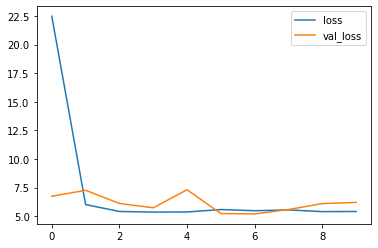

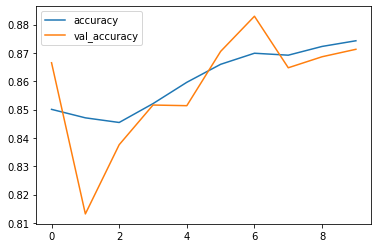

In [60]:
import pandas as pd

history_frame = pd.DataFrame(history.history)

history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();